In [1]:
%matplotlib inline
import numpy as np

In [2]:
import peplearn as lp
from peplearn import data, features, plot

import sklearn

In [20]:
charge = lp.features.SequenceCharge("amino-acid-data-table.csv",12)
main_features = lp.features.SequenceMain("amino-acid-data-table.csv",12,use_sliding_windows=False,use_flip_pattern=False) #False,use_flip_pattern=False)

ml = lp.data.MachineLearnerData("enrich-in-p000.txt") # 0.100uM.txt")
#ml = lp.data.MachineLearnerData("test")
#ml.add_feature(charge)
ml.add_feature(main_features)


In [21]:
ml.remove_filters()
ml.remove_classes()
#ml.add_classes([-5,0,5])
#ml.add_cutoff_filter(">",-2)

n: 40, r2: -1.222
                   dS_exu 12.15
               pct_buried  6.62
                  dS_buex  5.93
            asa_mainchain  5.81
                  cf_beta  4.46
      asa_sidechain_polar  4.23
   asa_sidechain_nonpolar  4.05
                       mw  3.88
                knob_mc_b  3.72
          white_interface  3.54
                 cf_alpha  3.49
                  cf_turn  3.45
                 engleman  3.27
                   volume  3.19
                     dSbb  3.12
                knob_sc_b  2.97
            num_acceptors  2.93
               hoop_woods  2.87
            white_octanol  2.59
              socket_mc_x  2.44
          kyte_dootlittle  2.36
              socket_mc_y  2.36
              socket_sc_h  2.26
              socket_mc_h  1.94
              socket_sc_x  1.91
              socket_sc_y  1.89
               num_donors  1.78
                 aromatic  0.80
                    dummy  0.00


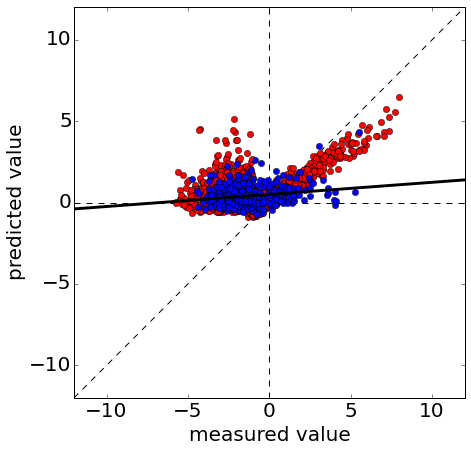

In [31]:
from sklearn import ensemble

fst = sklearn.ensemble.RandomForestRegressor(n_estimators=40)
#weights = np.exp(ml.training_values)
weights = (ml.training_values >= -1)*10


#fst = sklearn.ensemble.RandomForestClassifier(n_estimators=20)
fst.fit(ml.training_features, ml.training_values,sample_weight=weights) 




lp.plot.correlation(ml,fst)

print("n: {:d}, r2: {:.3f}".format(fst.n_estimators,fst.score(ml.test_features,ml.test_values)))

order = np.argsort(fst.feature_importances_)
order = order[::-1]
for i in order:
    #print("{}{:6.2f}".format(ml._feature_names[i],100*fst.feature_importances_[i]))
    print("{:>25s}{:6.2f}".format(ml.feature_names[i],100*fst.feature_importances_[i]))
    #print("{:6.2f}".format(100*fst.feature_importances_[i]))

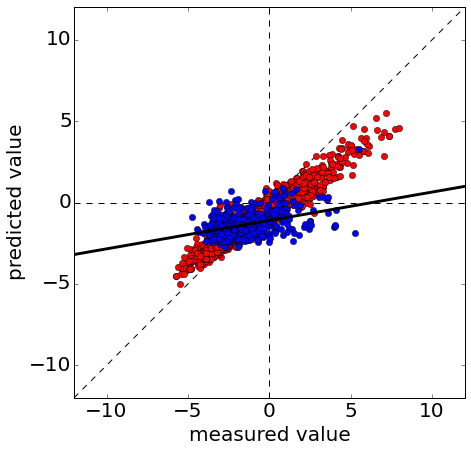

In [29]:
from sklearn import ensemble

fst = sklearn.ensemble.RandomForestRegressor(n_estimators=20) # good
#fst = sklearn.ensemble.AdaBoostRegressor() # flat
#fst = sklearn.ensemble.BaggingRegressor() # good
#fst = sklearn.ensemble.ExtraTreesRegressor(n_estimators=20) #good
#fst = sklearn.ensemble.GradientBoostingRegressor() #good
fst.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,fst)

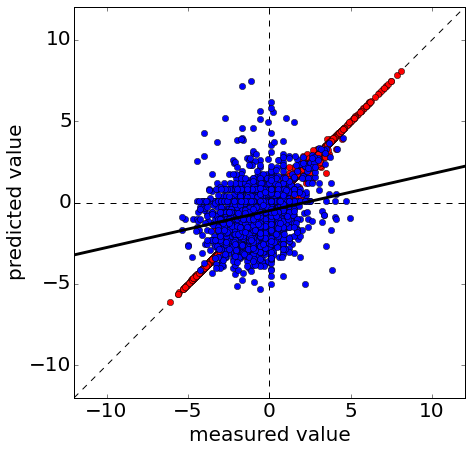

In [20]:
from sklearn import tree 
#tre = sklearn.tree.DecisionTreeRegressor() #bad
tre = sklearn.tree.ExtraTreeRegressor() #bad
tre.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,tre)

In [ ]:
from sklearn import linear_model
#clf = sklearn.linear_model.BayesianRidge(alpha_1=0.00001)
#clf = sklearn.linear_model.ElasticNet()
#clf = sklearn.linear_model.LassoLars(alpha=0.1)
#clf = sklearn.linear_model.Perceptron() # requires classes
#clf = sklearn.linear_model.PassiveAggressiveRegressor()
#clf = sklearn.linear_model.RANSACRegressor()
#clf = sklearn.linear_model.SGDRegressor()



clf.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,clf)

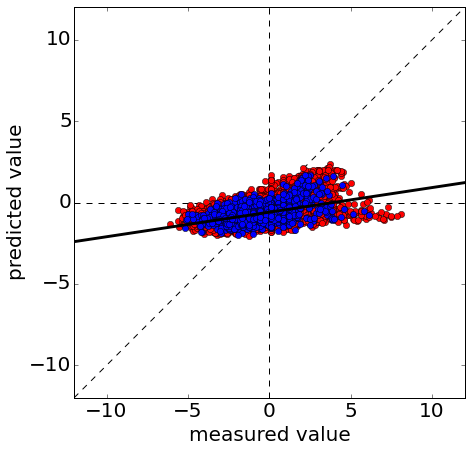

In [42]:
from sklearn import svm

#sv = sklearn.svm.SVR()
sv = sklearn.svm.NuSVR()

sv.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,sv)